created by Beyza Balota 
25.04.2023

# Importing the necessary libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt

# 1. Processing the data

In [2]:
# set the seed
np.random.seed(42)
 
# read the data 
data = pd.read_csv('titanicdata.csv')

features = data[['Age', 'Sex', 'Pclass']]
target = data['Survived']

# split the data 
train_features, test_features, train_target, test_target = train_test_split(
    features, target, test_size=0.4, random_state=42)  # 40% for test+validation
validation_features, test_features, validation_target, test_target = train_test_split(
    test_features, test_target, test_size=0.5, random_state=42)  # Split the 40% into two 20%

# scale the features with scaler
scaler = MinMaxScaler()
train_features_scaled = scaler.fit_transform(train_features)
validation_features_scaled = scaler.transform(validation_features)
test_features_scaled = scaler.transform(test_features)


# 2. Implementing the logistic regression model 

# and

# 3. Training the data 
with step size = 1

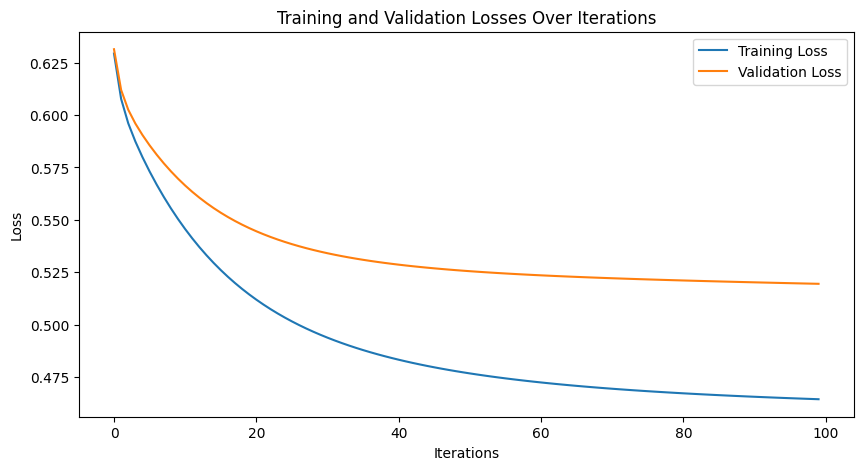

In [3]:

train_features_scaled = np.column_stack([np.ones(train_features_scaled.shape[0]), train_features_scaled])
validation_features_scaled = np.column_stack([np.ones(validation_features_scaled.shape[0]), validation_features_scaled])

# initialize parameters
w = np.zeros(train_features_scaled.shape[1])

# gradient descent parameters
alpha = 1 # step size
num_iterations = 100

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_cost(X, y, w):
    m = len(y)
    z = np.dot(X, w)
    predictions = sigmoid(z)
    cost = -1/m * np.sum(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))
    return cost

def gradient_descent(X, y, X_val, y_val, w, alpha, num_iterations):
    m = len(y)
    training_cost_history = []
    validation_cost_history = []

    for i in range(num_iterations):
        z = np.dot(X, w)
        predictions = sigmoid(z)
        gradient = np.dot(X.T, (predictions - y)) / m
        w -= alpha * gradient
        
        # calculate cost 
        training_cost = compute_cost(X, y, w)
        validation_cost = compute_cost(X_val, y_val, w)
        training_cost_history.append(training_cost)
        validation_cost_history.append(validation_cost)

    return w, training_cost_history, validation_cost_history


w, training_loss, validation_loss = gradient_descent(train_features_scaled, train_target, validation_features_scaled, validation_target, w, alpha, num_iterations)

# plotting the training and validation losses over iterations
plt.figure(figsize=(10, 5))
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Training and Validation Losses Over Iterations')
plt.legend()
plt.show()


# 4. Calculation of validation loss in each step

Trained with rate = 0.02, iterations = 150, final validation loss = 0.6053485874580481
Trained with rate = 0.02, iterations = 300, final validation loss = 0.5862804824407335
Trained with rate = 0.02, iterations = 600, final validation loss = 0.5639611143172955
Trained with rate = 0.02, iterations = 2500, final validation loss = 0.5258472300492762
Trained with rate = 0.02, iterations = 3000, final validation loss = 0.5237446578164486
Trained with rate = 0.03, iterations = 150, final validation loss = 0.5942797516861382
Trained with rate = 0.03, iterations = 300, final validation loss = 0.5737413616440215
Trained with rate = 0.03, iterations = 600, final validation loss = 0.5499861335531165
Trained with rate = 0.03, iterations = 2500, final validation loss = 0.5217089133653265
Trained with rate = 0.03, iterations = 3000, final validation loss = 0.5202860039938096
Trained with rate = 0.06, iterations = 150, final validation loss = 0.5737235804740575
Trained with rate = 0.06, iterations = 

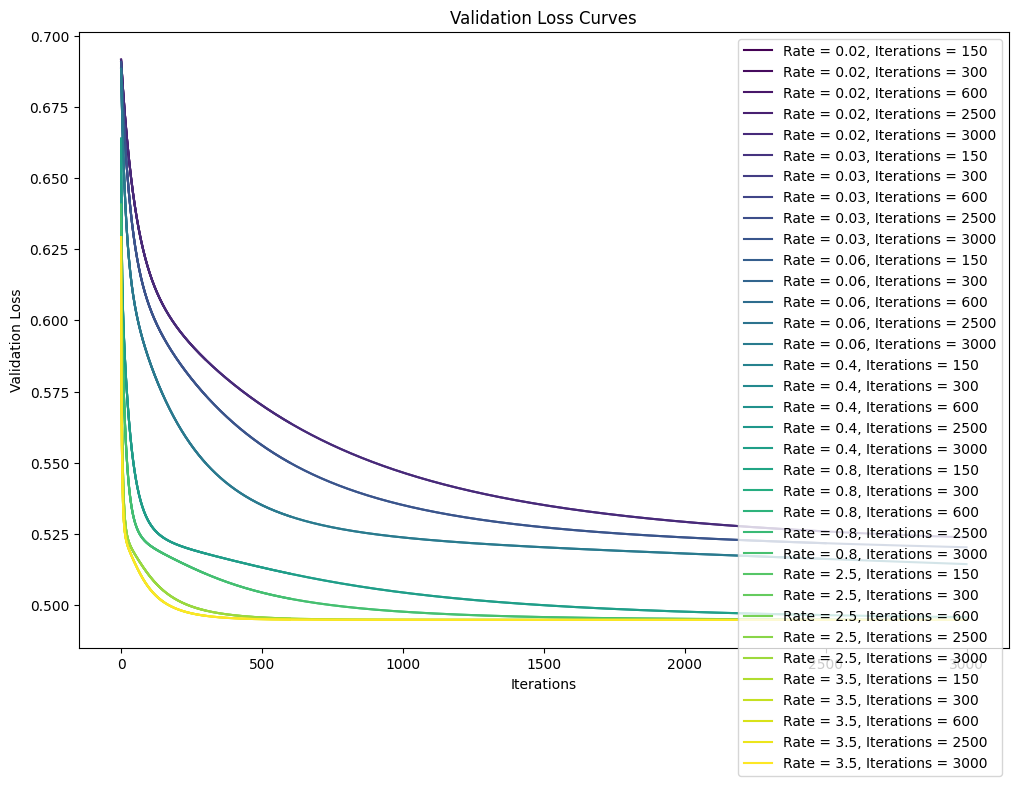

Best learning rate: 3.5
Best number of iterations: 3000
Best validation loss: 0.4947937533133217


In [4]:
import matplotlib.cm as cm

# define the range of learning rates and iteration counts (I defined them randomly)
learning_rates = [0.02, 0.03, 0.06, 0.4, 0.8, 2.5, 3.5]
iteration_counts = [150, 300, 600, 2500, 3000]


# dictionary to keep the loss history
loss_histories = {}


for lr in learning_rates:
    for it in iteration_counts:
        w = np.zeros(train_features_scaled.shape[1])
        # run gradient descent and get the loss history
        w, training_loss_history, validation_loss_history = gradient_descent(
            train_features_scaled, train_target, 
            validation_features_scaled, validation_target, 
            w, lr, it
        )
        # store the loss history 
        loss_histories[(lr, it)] = validation_loss_history
        print(f"Trained with rate = {lr}, iterations = {it}, final validation loss = {validation_loss_history[-1]}")

# using different colors for a readable graph
colors = cm.viridis(np.linspace(0, 1, len(learning_rates) * len(iteration_counts)))

plt.figure(figsize=(12, 8))
for i, ((lr, it), loss_history) in enumerate(loss_histories.items()):
    plt.plot(loss_history, label=f"Rate = {lr}, Iterations = {it}", color=colors[i])

plt.title("Validation Loss Curves")
plt.xlabel("Iterations")
plt.ylabel("Validation Loss")
plt.legend()
plt.show()

# find the combination with the best final validation loss
best_lr_it = min(loss_histories, key=lambda x: loss_histories[x][-1])
best_lr, best_it = best_lr_it
best_validation_loss = loss_histories[best_lr_it][-1]
print(f"Best learning rate: {best_lr}")
print(f"Best number of iterations: {best_it}")
print(f"Best validation loss: {best_validation_loss}")


# 5. Combining the validation and training data

Final training loss after retraining with combined data: 0.4625916743691114


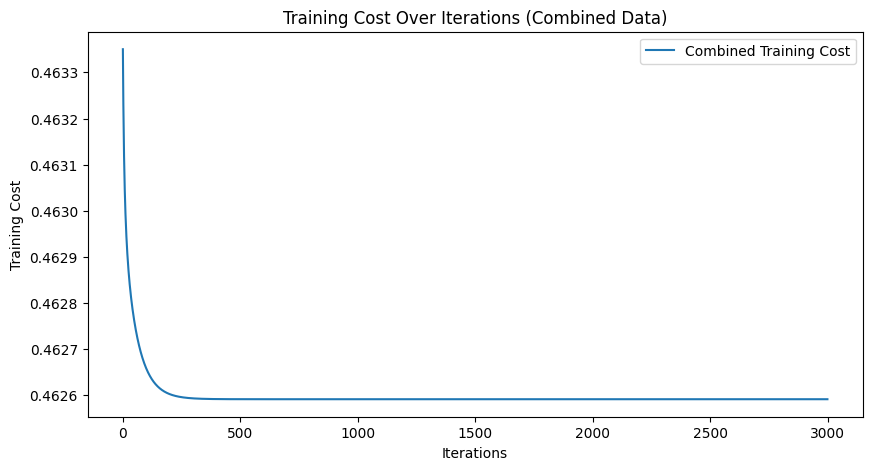

In [5]:
combined_features_scaled = np.vstack((train_features_scaled, validation_features_scaled))

# combine training and validation target labels
combined_target = np.concatenate((train_target, validation_target))

# retrain the model w/ best hyperparameters
w, combined_training_loss_history, _ = gradient_descent(
    combined_features_scaled, combined_target, 
    combined_features_scaled, combined_target,  # Using combined data for training and validation
    w, best_lr, best_it
)

final_training_loss = combined_training_loss_history[-1]
print(f"Final training loss after retraining with combined data: {final_training_loss}")

# plot the training cost with combined data
plt.figure(figsize=(10, 5))
plt.plot(combined_training_loss_history, label='Combined Training Cost')
plt.xlabel('Iterations')
plt.ylabel('Training Cost')
plt.title('Training Cost Over Iterations (Combined Data)')
plt.legend()
plt.show()




# 6. Accuracy of the model

In [6]:
# intercept term to test features
test_features_scaled_with_intercept = np.column_stack([np.ones(test_features_scaled.shape[0]), test_features_scaled])
test_predictions = sigmoid(np.dot(test_features_scaled_with_intercept, w))

# converting probabilities to binary predictions
binary_predictions = (test_predictions >= 0.5).astype(int)
accuracy = np.mean(binary_predictions == test_target)

# calculate as percentage
accuracy_percentage = accuracy * 100

print(f"Accuracy on testing data: {accuracy_percentage:.2f}%")

Accuracy on testing data: 81.56%
